In [1]:
# Set up
# $ export SPARK_HOME=/Users/mparsian/spark-2.4.4
# $ export PATH=$SPARK_HOME/bin:$PATH
# $ export PYSPARK_DRIVER_PYTHON=jupyter
# $ export PYSPARK_DRIVER_PYTHON_OPTS='notebook'
# $ /Users/mparsian/spark-2.4.4/bin/pyspark


# Source:
#   Building A Linear Regression with PySpark and MLlib
#   https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a

# import required libraries
from pyspark.sql import SparkSession

In [3]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
input_path = '/Users/mparsian/zmp/github/machine-learning-course/data/Boston.csv'
house_df = spark.read\
          .format("csv")\
          .option("header","true")\
          .option("inferSchema", "true")\
          .load(input_path)

house_df.take(5)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0),
 Row(_c0=2, crim=0.02731, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=6.421, age=78.9, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=396.9, lstat=9.14, medv=21.6),
 Row(_c0=3, crim=0.02729, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=7.185, age=61.1, dis=4.9671, rad=2, tax=242, ptratio=17.8, black=392.83, lstat=4.03, medv=34.7),
 Row(_c0=4, crim=0.03237, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=6.998, age=45.8, dis=6.0622, rad=3, tax=222, ptratio=18.7, black=394.63, lstat=2.94, medv=33.4),
 Row(_c0=5, crim=0.06905, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=7.147, age=54.2, dis=6.0622, rad=3, tax=222, ptratio=18.7, black=396.9, lstat=5.33, medv=36.2)]

In [6]:
house_df.show(truncate=False)

+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|_c0|crim   |zn  |indus|chas|nox  |rm   |age  |dis   |rad|tax|ptratio|black |lstat|medv|
+---+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|1  |0.00632|18.0|2.31 |0   |0.538|6.575|65.2 |4.09  |1  |296|15.3   |396.9 |4.98 |24.0|
|2  |0.02731|0.0 |7.07 |0   |0.469|6.421|78.9 |4.9671|2  |242|17.8   |396.9 |9.14 |21.6|
|3  |0.02729|0.0 |7.07 |0   |0.469|7.185|61.1 |4.9671|2  |242|17.8   |392.83|4.03 |34.7|
|4  |0.03237|0.0 |2.18 |0   |0.458|6.998|45.8 |6.0622|3  |222|18.7   |394.63|2.94 |33.4|
|5  |0.06905|0.0 |2.18 |0   |0.458|7.147|54.2 |6.0622|3  |222|18.7   |396.9 |5.33 |36.2|
|6  |0.02985|0.0 |2.18 |0   |0.458|6.43 |58.7 |6.0622|3  |222|18.7   |394.12|5.21 |28.7|
|7  |0.08829|12.5|7.87 |0   |0.524|6.012|66.6 |5.5605|5  |311|15.2   |395.6 |12.43|22.9|
|8  |0.14455|12.5|7.87 |0   |0.524|6.172|96.1 |5.9505|5  |311|15.2   |396.9 |19.15|27.1|
|9  |0.21124|12.5|7.8

In [7]:
house_df.cache()
house_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [8]:
house_df = house_df.drop('_c0')
house_df.show(truncate=False)

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|crim   |zn  |indus|chas|nox  |rm   |age  |dis   |rad|tax|ptratio|black |lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0|2.31 |0   |0.538|6.575|65.2 |4.09  |1  |296|15.3   |396.9 |4.98 |24.0|
|0.02731|0.0 |7.07 |0   |0.469|6.421|78.9 |4.9671|2  |242|17.8   |396.9 |9.14 |21.6|
|0.02729|0.0 |7.07 |0   |0.469|7.185|61.1 |4.9671|2  |242|17.8   |392.83|4.03 |34.7|
|0.03237|0.0 |2.18 |0   |0.458|6.998|45.8 |6.0622|3  |222|18.7   |394.63|2.94 |33.4|
|0.06905|0.0 |2.18 |0   |0.458|7.147|54.2 |6.0622|3  |222|18.7   |396.9 |5.33 |36.2|
|0.02985|0.0 |2.18 |0   |0.458|6.43 |58.7 |6.0622|3  |222|18.7   |394.12|5.21 |28.7|
|0.08829|12.5|7.87 |0   |0.524|6.012|66.6 |5.5605|5  |311|15.2   |395.6 |12.43|22.9|
|0.14455|12.5|7.87 |0   |0.524|6.172|96.1 |5.9505|5  |311|15.2   |396.9 |19.15|27.1|
|0.21124|12.5|7.87 |0   |0.524|5.631|100.0|6.0821|5  |311|15.2   

In [9]:
#Perform descriptive analytics
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
crim,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
zn,506,11.363636363636363,23.32245299451514,0.0,100.0
indus,506,11.136778656126504,6.860352940897589,0.46,27.74
chas,506,0.0691699604743083,0.2539940413404101,0,1
nox,506,0.5546950592885372,0.11587767566755584,0.385,0.871
rm,506,6.284634387351787,0.7026171434153232,3.561,8.78
age,506,68.57490118577078,28.148861406903595,2.9,100.0
dis,506,3.795042687747034,2.10571012662761,1.1296,12.1265
rad,506,9.549407114624506,8.707259384239366,1,24


In [10]:
# Scatter matrix is a great way to roughly determine 
# if we have a linear correlation between multiple independent variables.

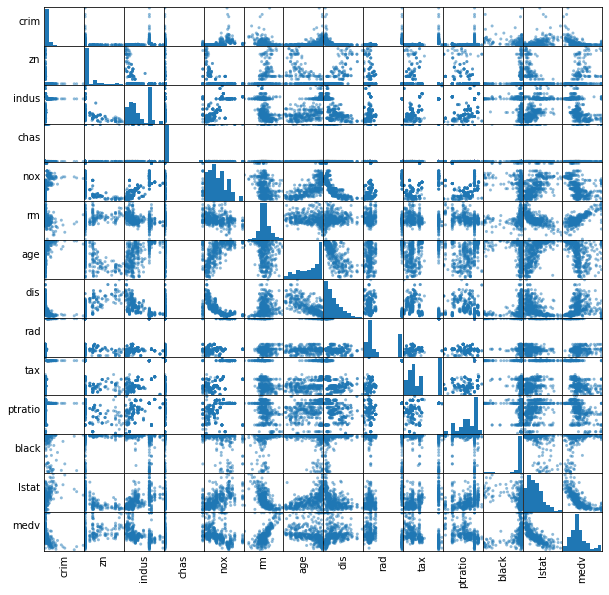

In [12]:
import pandas as pd
numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [16]:
# It’s hard to see. 
# Let’s find correlation between independent variables and target variable.

# DID NOT WORK
### import six
### for i in house_df.columns:
###    if not( isinstance(house_df.select(i).take(1)[0][0], six.string_types)):
###        print( "Correlation to MV for ", i, house_df.stat.corr('MV',i))

# Correlation to MV for  CRIM -0.3883046116575088
# Correlation to MV for  ZN 0.36044534463752903
# Correlation to MV for  INDUS -0.48372517128143383
# Correlation to MV for  CHAS 0.17526017775291847
# Correlation to MV for  NOX -0.4273207763683772
# Correlation to MV for  RM 0.695359937127267
# Correlation to MV for  AGE -0.37695456714288667
# Correlation to MV for  DIS 0.24992873873512172
# Correlation to MV for  RAD -0.3816262315669168
# Correlation to MV for  TAX -0.46853593528654536
# Correlation to MV for  PT -0.5077867038116085
# Correlation to MV for  B 0.3334608226834164
# Correlation to MV for  LSTAT -0.7376627294671615
# Correlation to MV for  MV 1.0

In [17]:
# correlation???

# The correlation coefficient ranges from –1 to 1. 

# *
# When it is close to 1, it means that there is a 
# strong positive correlation; for example, the median 
# value tends to go up when the number of rooms goes up. 

# *
# When the coefficient is close to –1, it means that 
# there is a strong negative correlation; the median 
# value tends to go down when the percentage of the 
# lower status of the population goes up. 

# Finally, coefficients close to zero mean that there 
# is no linear correlation.

In [24]:
# Building Model:
# We are going to keep all the variables, for now.
# Prepare data for Machine Learning. 
# And we need two columns only — features and label(“MEDV”):
#
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], outputCol = 'features')


In [26]:
vhouse_df = vectorAssembler.transform(house_df)


In [27]:
vhouse_df = vhouse_df.select(['features', 'medv'])
vhouse_df.show(3)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
+--------------------+----+
only showing top 3 rows



In [28]:
vhouse_df.show(3, truncate=False)

+-------------------------------------------------------------------------+----+
|features                                                                 |medv|
+-------------------------------------------------------------------------+----+
|[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98]  |24.0|
|[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14] |21.6|
|[0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03]|34.7|
+-------------------------------------------------------------------------+----+
only showing top 3 rows



In [29]:
# Split Data
splits = vhouse_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [30]:
train_df.count()

365

In [31]:
test_df.count()

141

In [32]:
# Build Linear Regression Model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='medv', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)


In [33]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-0.0467015061995267,0.0035128722976765893,0.0,2.737557766514479,-6.192467916569171,4.902472703717043,0.0,-0.6107598361470722,0.00892756710464509,0.0,-0.709363371697302,0.008400599608252655,-0.5426911549963138]
Intercept: 14.324579677674057


In [34]:
# Summarize the model over the training set and print out some metrics:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 5.057277
r2: 0.722463


In [35]:
# RMSE measures the differences between predicted values 
# by the model and the actual values. However, RMSE alone 
# is meaningless until we compare with the actual “medv” value, 
# such as mean, min and max. After such comparison, 
# our RMSE looks pretty good.

In [36]:
train_df.describe().show()

+-------+----------------+
|summary|            medv|
+-------+----------------+
|  count|             365|
|   mean|22.7427397260274|
| stddev|9.61283957948807|
|    min|             5.0|
|    max|            50.0|
+-------+----------------+



In [37]:
# R-squared at 0.72 indicates that in our model, 
# approximate 72% of the variability in “medv” 
# can be explained using the model. This is in 
# align with the result from Scikit-Learn. It is not bad. 
# However, we must be cautious that the performance on 
# the training set may not a good approximation of 
# the performance on the test set.

# R-squared is the percentage of the dependent 
# variable variation that a linear model explains.
#
# R-squared = [variance explained by the model] / [Total variance]

# R-squared is always between 0 and 100%:

In [38]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","medv","features").show(5)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|32.260663553397485|32.7|[0.01301,35.0,1.5...|
|27.352854586510773|24.5|[0.01501,80.0,2.0...|
|42.111671741940825|50.0|[0.01501,90.0,1.2...|
| 26.77005907079112|33.0|[0.01951,17.5,1.3...|
|25.713107282504566|24.7|[0.02055,85.0,0.7...|
+------------------+----+--------------------+
only showing top 5 rows



In [39]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R Squared (R2) on test data = 0.688534


In [40]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.46437


In [45]:
# Number of iterations to build model?
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))


numIterations: 11
objectiveHistory: [0.5000000000000004, 0.43272904923173133, 0.237066021950322, 0.2113580471245921, 0.17896628784497942, 0.17626829018816448, 0.17563113161540347, 0.17497044358926883, 0.17407677566677826, 0.17368324552512224, 0.17359481994783688]


In [46]:
trainingSummary.residuals.count()


365

In [47]:
trainingSummary.residuals.show()

+--------------------+
|           residuals|
+--------------------+
| -6.5789827962666365|
|  1.5395238337556378|
|  -5.286261244287246|
|   4.966209574945751|
|    2.09473693036675|
|  11.330246894626207|
|  0.6488892605177767|
|  -1.259125786934888|
|   8.820993056192648|
|  3.6484697479240715|
|  1.6523587939734696|
| -2.7804629500835176|
|-0.06284066475195971|
|  10.332752372046698|
|-0.00694985431901...|
| -10.161984648059374|
|  -4.029296800956303|
|   1.806052568225919|
| -1.8431602736120247|
|  0.0314395085710828|
+--------------------+
only showing top 20 rows



In [48]:
# Make Predictions:
#Using our Linear Regression model to make some predictions:
predictions = lr_model.transform(test_df)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|32.260663553397485|32.7|[0.01301,35.0,1.5...|
|27.352854586510773|24.5|[0.01501,80.0,2.0...|
|42.111671741940825|50.0|[0.01501,90.0,1.2...|
| 26.77005907079112|33.0|[0.01951,17.5,1.3...|
|25.713107282504566|24.7|[0.02055,85.0,0.7...|
|36.745727019042114|42.3|[0.02177,82.5,2.0...|
|27.842984315727477|23.9|[0.02543,55.0,3.7...|
| 32.11374824225182|34.7|[0.02729,0.0,7.07...|
|22.323907904192904|20.6|[0.03306,0.0,5.19...|
| 24.05970191532647|19.4|[0.03466,35.0,6.0...|
|30.512629997828192|28.5|[0.03502,80.0,4.9...|
| 38.29322964195228|48.5|[0.0351,95.0,2.68...|
|24.471576162031212|22.9|[0.03551,25.0,4.8...|
| 27.05360936406064|22.0|[0.03932,0.0,3.41...|
|21.776995279261822|21.1|[0.03961,0.0,5.19...|
|16.620295927207756|18.2|[0.04301,80.0,1.9...|
|26.886367800383955|23.9|[0.04462,25.0,4.8...|
|31.863225447338067|30.3|[0.04666,80.0,1.5...|
|26.769415263